<a href="https://colab.research.google.com/github/Garimakumari14/Image-Captioning-using-Deep-Learning/blob/main/Image_captioning_Project(Garima).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# this is a subset of much larger data containing links to around 3.3M images and their captions
# i have downloaded 1800+ of these images for the session [ from the validation set]
# you can try working with larger set and see if that gives better results
# search google conceptual captions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget http://nlp.stanford.edu/data/glove.42B.300d.zip #Using glove Data Embedding , You Can also use Fasttext or Word to vec Also.
!unzip glove.42B.300d.zip  # Fasttext has other slangs and details which we wont need so no using
!rm glove.42B.300d.zip # Use Fasttext when using instagram or Facebook images data

--2025-04-09 00:56:45--  http://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.42B.300d.zip [following]
--2025-04-09 00:56:45--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2025-04-09 00:56:45--  https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]


In [ ]:
#So we are using Inception V3 as it is a Feature Extractor which will be used for image feature extractor
# from Images so use some layers of this model
from tensorflow.keras.applications.inception_v3 import InceptionV3
import tensorflow.keras.applications.inception_v3 as inception
from tensorflow.keras.models import Model
from tensorflow.keras import Input
import tensorflow.keras.preprocessing.image as tf_image #For Preprocessing the images
import pandas as pd
import numpy as np

In [ ]:
encode_model = InceptionV3(weights='imagenet') #Weights if Imagenet
encode_model = Model(encode_model.input, encode_model.layers[-2].output) #Taking Encode Model
# We are only taking feature extraction properies of this model as last 2 are classification properties
WIDTH = 299 # Setting standard of Images
HEIGHT = 299
OUTPUT_DIM = 2048
START = "startseq" #Knowing Where the Sentence seq is starting and ending while passing through LSTM
STOP = "endseq"
EPOCHS = 10
preprocess_input = inception.preprocess_input # taking Pre_In from Inception to preproces image Dataset

In [ ]:
#Passing Image to Feature Vector
def encodeImage(img):  #Passing image to an Array
  img = img.resize((WIDTH, HEIGHT))#(299,299) converted to size
  x = tf_image.img_to_array(img)
  x = np.expand_dims(x, axis=0)#expand the image dim like (x,299,299)
  x = preprocess_input(x)
  x = encode_model.predict(x) # Get the encoding vector for the image
  x = np.reshape(x, OUTPUT_DIM )#flattened way to reshape we get (x,2048)
#this is how image data is changeing internally
  return x

In [ ]:
#Testing on sample Image
img=tf_image.load_img('/content/drive/MyDrive/Colab Notebooks/Project/images/1.jpg', target_size=(299,299))
encodeImage(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


array([0.36294484, 0.21345316, 0.80201435, ..., 0.3665316 , 0.22385047,
       0.50166726], dtype=float32)

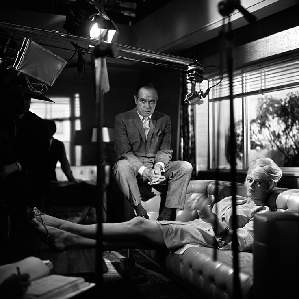

In [ ]:
img #We can see the image

In [ ]:
#containe Image captions and URL and Image Name with It
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/image_caption_map.csv')

In [ ]:
data.head(2)

,caption,url,file_name
0,author : a life in photography -- in pictures,https://i.pinimg.com/736x/66/01/6c/66016c3ba27...,1.jpg
1,photograph of the sign being repaired by brave...,http://indianapolis-photos.funcityfinder.com/f...,3.jpg


In [ ]:
data['caption']=data['caption'].apply(lambda x:START+' '+x+' '+STOP) # will add Start and stop seq at caption

In [ ]:
data.shape[0]

1832

In [ ]:
remove_these=[] #in this list we will add names of files that are not encoded properly
encoded_images={} #This dictionary will hold encoded images and names
for i in range(data.shape[0]): #iterate on images
  image_path='/content/drive/MyDrive/Colab Notebooks/Project/images/'+data['file_name'][i] #iterate on indexes
  print(image_path)
  try:
    img = tf_image.load_img(image_path, target_size=(HEIGHT, WIDTH))
    encoded_images[int(data['file_name'][i].split('.')[0])] = encodeImage(img)
  except:
    print('remove: ',i)
    remove_these.append(data['file_name'][i])
# some of the images are not in supported format
# we'll exclude those

/content/drive/MyDrive/Colab Notebooks/Project/images/1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
/content/drive/MyDrive/Colab Notebooks/Project/images/3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
/content/drive/MyDrive/Colab Notebooks/Project/images/4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
/content/drive/MyDrive/Colab Notebooks/Project/images/5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
/content/drive/MyDrive/Colab Notebooks/Project/images/6.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
/content/drive/MyDrive/Colab Notebooks/Project/images/7.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
/content/drive/MyDrive/Colab Notebooks/Project/images/8.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
/content/drive/MyDrive/Colab Notebooks/Project/images/9.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
/content/drive/MyDrive/Colab Notebooks/Project/images/11.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
/content/drive/MyDrive/Colab Notebooks/Project/images/12.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
/content

In [ ]:
len(remove_these)

42

In [ ]:
data=data[-data['file_name'].isin(remove_these)]

In [ ]:
data.shape

(1790, 3)

In [ ]:
data

,caption,url,file_name
0,startseq author : a life in photography -- in ...,https://i.pinimg.com/736x/66/01/6c/66016c3ba27...,1.jpg
1,startseq photograph of the sign being repaired...,http://indianapolis-photos.funcityfinder.com/f...,3.jpg
2,startseq the player staring intently at a comp...,http://www.abc.net.au/news/image/9066492-3x2-7...,4.jpg
3,startseq globes : the green 3d person carrying...,https://www.featurepics.com/StockImage/2009031...,5.jpg
4,startseq the - bedroom stone cottage can sleep...,http://i.dailymail.co.uk/i/pix/2014/11/05/1415...,6.jpg
...,...,...,...
1827,startseq person and groom embrace under the ve...,https://static1.squarespace.com/static/564125d...,2082.jpg
1828,startseq a bronze horse head sculpture against...,http://l7.alamy.com/zooms/39b15fd8b3af47bf9a7b...,2084.jpg
1829,startseq use a large mirror to make a small be...,https://cdn.homedit.com/wp-content/uploads/201...,2085.jpg
1830,startseq model and person attend awards endseq,https://media.gettyimages.com/photos/musician-...,2086.jpg


In [ ]:
data.reset_index(drop=True,inplace=True)

In [ ]:
data['id']=[int(data['file_name'][i].split('.')[0]) for i in range(data.shape[0])] #Getting First part of File Name

In [ ]:
len(encoded_images)

1790

In [ ]:
# clean up captions

In [ ]:
from string import punctuation
import re
from nltk import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
data['caption']=data['caption'].apply(lambda x:re.sub("["+punctuation+"]",' ',x)) # remove punctuations

In [ ]:
data['caption']=data['caption'].apply(lambda x:re.sub("\d",' ',x))

In [ ]:
data['caption']=data['caption'].apply(lambda x:re.sub("\s+",' ',x))

In [ ]:
data['caption']=data['caption'].str.lower()

In [ ]:
data['caption']

0       startseq author a life in photography in pictu...
1       startseq photograph of the sign being repaired...
2       startseq the player staring intently at a comp...
3       startseq globes the green d person carrying in...
4       startseq the bedroom stone cottage can sleep p...
                              ...                        
1785    startseq person and groom embrace under the ve...
1786    startseq a bronze horse head sculpture against...
1787    startseq use a large mirror to make a small be...
1788       startseq model and person attend awards endseq
1789    startseq abstract background laser light multi...
Name: caption, Length: 1790, dtype: object

In [ ]:
word_count_threshold = 5 # not want longer captions only till 5
word_counts = {}
for caption in data['caption']:
    for w in word_tokenize(caption):
        word_counts[w] = word_counts.get(w, 0) + 1

vocab = [w for w in word_counts if word_counts[w] >= word_count_threshold]
print('preprocessed words %d ==> %d' % (len(word_counts), len(vocab)))

preprocessed words 3714 ==> 574


In [ ]:
caption_lens=[]
for caption in data['caption']:
  words=word_tokenize(caption)
  words=[w for w in words if w in vocab]
  caption_lens.append(len(words))
max_length=max(caption_lens)

In [ ]:
idxtoword = {}
wordtoidx = {}

ix = 1
for w in vocab:
    wordtoidx[w] = ix
    idxtoword[ix] = w
    ix += 1

vocab_size = len(idxtoword) + 1
vocab_size

575

In [ ]:
max_length=max(caption_lens)

In [ ]:
max_length

25

In [ ]:

embeddings_index = {}
f = open( 'glove.42B.300d.txt', encoding="utf-8")

for line in f:
    line=line.strip()
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print(f'Found {len(embeddings_index)} word vectors.')

Found 1917494 word vectors.


In [ ]:
embedding_dim = 300

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in wordtoidx.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization,add
from tqdm import tqdm

In [ ]:
data.shape

(1790, 4)

In [ ]:
def data_generator(data, encoded_images, wordtoidx, max_length, num_photos_per_batch):
  # x1 - Training data for photos
  # x2 - The caption that goes with each photo
  # y - The predicted rest of the caption
  x1, x2, y = [], [], []
  n=0
  while True:
    for k,caption in enumerate(data['caption']):
      n+=1
      photo = encoded_images[data['id'][k]]
      # Each photo has 5 descriptions
      seq = [wordtoidx[word] for word in word_tokenize(caption) if word in wordtoidx]
        # Generate a training case for every possible sequence and outcome
      for i in range(1, len(seq)):
        in_seq, out_seq = seq[:i], seq[i]
        in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
        out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
        x1.append(photo)
        x2.append(in_seq)
        y.append(out_seq)
      if n==num_photos_per_batch:
        yield ([np.array(x1), np.array(x2)], np.array(y))
        # next when generator gets called iteration will start from where we left off
        # this makes it make a pass through the complete data in an epoch
        x1, x2, y = [], [], []
        n=0

In [ ]:
len(encoded_images.keys())

1790

In [ ]:
data.shape

(1790, 4)

In [ ]:
# data_generator(data, encoded_images, wordtoidx, max_length, 1)

In [ ]:
inputs1 = Input(shape=(OUTPUT_DIM,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)
caption_model = Model(inputs=[inputs1, inputs2], outputs=outputs)

In [ ]:
caption_model.layers[2].set_weights([embedding_matrix])
caption_model.layers[2].trainable = False
caption_model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
number_pics_per_batch = 3
steps = len(data['caption'])//number_pics_per_batch

In [ ]:
encoded_images[99].shape

(2048,)

In [ ]:
for i in range(EPOCHS*2):
  generator = data_generator(data, encoded_images, wordtoidx, max_length, number_pics_per_batch)
  caption_model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)






<ipython-input-44-4e5903ac9d40>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  caption_model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)


596/596 [==============================] - 50s 83ms/step - loss: 1.5440


In [ ]:
caption_model.optimizer.lr = 1e-4
number_pics_per_batch = 6
steps = len(data['caption'])//number_pics_per_batch

for i in tqdm(range(EPOCHS)):
    generator = data_generator(data, encoded_images, wordtoidx, max_length, number_pics_per_batch)
    caption_model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)

  0%|          | 0/10 [00:00<?, ?it/s]

  1/298 [..............................] - ETA: 35s - loss: 1.2061

<ipython-input-45-1c6409caae3b>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  caption_model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)


298/298 [==============================] - 35s 116ms/step - loss: 2.0392


 10%|█         | 1/10 [00:34<05:12, 34.67s/it]

298/298 [==============================] - 39s 131ms/step - loss: 1.8503


 20%|██        | 2/10 [01:15<05:07, 38.41s/it]

298/298 [==============================] - 35s 118ms/step - loss: 1.7728


 30%|███       | 3/10 [01:50<04:18, 36.93s/it]

298/298 [==============================] - 36s 122ms/step - loss: 1.7389


 40%|████      | 4/10 [02:31<03:51, 38.54s/it]

298/298 [==============================] - 36s 121ms/step - loss: 1.7032


 50%|█████     | 5/10 [03:08<03:08, 37.67s/it]

298/298 [==============================] - 43s 143ms/step - loss: 1.6688


 60%|██████    | 6/10 [04:29<03:30, 52.73s/it]

298/298 [==============================] - 37s 124ms/step - loss: 1.6310


 70%|███████   | 7/10 [05:07<02:22, 47.61s/it]

298/298 [==============================] - 39s 129ms/step - loss: 1.6089


 80%|████████  | 8/10 [05:45<01:29, 44.78s/it]

298/298 [==============================] - 37s 124ms/step - loss: 1.5835


 90%|█████████ | 9/10 [06:26<00:43, 43.60s/it]

298/298 [==============================] - 36s 122ms/step - loss: 1.5569


100%|██████████| 10/10 [07:07<00:00, 42.78s/it]


In [ ]:
caption_model.save_weights('caption_model.hdf5')

In [ ]:
def generateCaption(photo):
    in_text = START
    for i in range(max_length):
        sequence = [wordtoidx[w] for w in in_text.split() if w in wordtoidx]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = caption_model.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = idxtoword[yhat]
        in_text += ' ' + word
        if word == STOP:
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

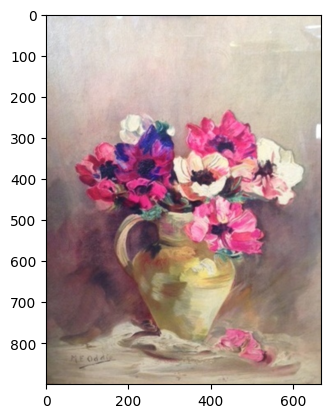

Caption: person th century on still life of flowers in a left


In [ ]:
index=79
image_file=data.iloc[index,2]

image=encoded_images[int(image_file.split('.')[0])]

image = image.reshape((1,OUTPUT_DIM))
x=plt.imread('/content/drive/MyDrive/collab_mount/image captioning/images/'+image_file)
plt.imshow(x)
plt.show()
print("Caption:",generateCaption(image))

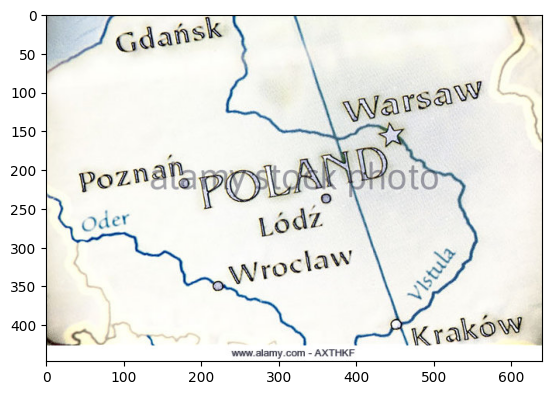

Caption: close up map showing the country


In [ ]:
index=1500
image_file=data.iloc[index,2]

image=encoded_images[int(image_file.split('.')[0])]

image = image.reshape((1,OUTPUT_DIM))
x=plt.imread('/content/drive/MyDrive/collab_mount/image captioning/images/'+image_file)
plt.imshow(x)
plt.show()
print("Caption:",generateCaption(image))

In [ ]:
from tensorflow.keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
json_file.write(model_json)
model.save_weights("model.h5")
# loading the model
from tensorflow.keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.summary()

TO DO:
1. Execute this Project further with CODE and Generate better TEST Results Improveing Model Performance
2. Try to Change Sample Data and Use A different CNN type Model Generator.
3. Display Which model features are generated by CNN as word embeddings.

In [ ]:

!pip install -q tensorflow


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, add
from sklearn.utils import shuffle


df = pd.read_csv('/content/drive/MyDrive/image_caption_map.csv')
df['caption'] = df['caption'].apply(lambda x: '<start> ' + x.strip() + ' <end>')

image_folder = '/content/drive/MyDrive/images'



In [ ]:

tokenizer = Tokenizer(oov_token='<unk>')
tokenizer.fit_on_texts(df['caption'].values)
vocab_size = len(tokenizer.word_index) + 1
max_length = max(len(c.split()) for c in df['caption'])


In [ ]:

# STEP 5: Build ResNet50 Feature Extractor
def build_feature_extractor():
    base_model = ResNet50(weights='imagenet')
    model = Model(base_model.input, base_model.layers[-2].output)
    return model

cnn_encoder = build_feature_extractor()

# STEP 6: Extract image features
def extract_features(image_path, model):
    img = Image.open(image_path).resize((224, 224)).convert('RGB')
    img = np.array(img)
    img = preprocess_input(img)
    img = np.expand_dims(img, axis=0)
    return model.predict(img)[0]


In [ ]:
!pip install -q tensorflow
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError # Import the UnidentifiedImageError exception class
import random
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, add
from sklearn.utils import shuffle

# ... (rest of your code) ...

image_features = {}
for fname in df['file_name'].unique():
    path = os.path.join(image_folder, fname)
    if os.path.exists(path):
        try:
            feature = extract_features(path, cnn_encoder)
            image_features[fname] = feature
        except UnidentifiedImageError: # Properly handle the exception using the imported class
            print(f"Skipping file {fname}: Could not identify image format.")
        except Exception as e:
            print(f"Skipping file {fname}: An error occurred - {e}")

# ... (rest of your code) ...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
def create_sequences(tokenizer, max_length, captions_list, features):
    X1, X2, y = [], [], []
    for caption, img_id in captions_list:
        seq = tokenizer.texts_to_sequences([caption])[0]
        for i in range(1, len(seq)):
            in_seq, out_seq = seq[:i], seq[i]
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
            out_seq = tf.keras.utils.to_categorical([out_seq], num_classes=vocab_size)[0]
            X1.append(features[img_id])
            X2.append(in_seq)
            y.append(out_seq)
    return np.array(X1), np.array(X2), np.array(y)

captions_data = list(zip(df['caption'], df['file_name']))
captions_data = [(cap, fname) for cap, fname in captions_data if fname in image_features]
captions_data = shuffle(captions_data, random_state=42)
X1, X2, y = create_sequences(tokenizer, max_length, captions_data, image_features)

# STEP 8: Build CNN-LSTM Model
def build_model(vocab_size, max_length):
    inputs1 = Input(shape=(2048,))
    fe1 = Dense(256, activation='relu')(inputs1)

    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = LSTM(256)(se1)

    decoder1 = add([fe1, se2])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)

    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    return model

model = build_model(vocab_size, max_length)

# STEP 9: Train
model.fit([X1, X2], y, epochs=5, batch_size=64)

# STEP 10: Generate captions
index_word = {v: k for k, v in tokenizer.word_index.items()}

def generate_caption(photo_feature, model, tokenizer, max_length):
    in_text = '<start>'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([photo_feature.reshape((1, 2048)), sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = index_word.get(yhat, '')
        if word == '<end>':
            break
        in_text += ' ' + word
    return in_text.replace('<start>', '').strip()

Epoch 1/5
299/299 ━━━━━━━━━━━━━━━━━━━━ 103s 331ms/step - loss: 6.6682
Epoch 2/5
299/299 ━━━━━━━━━━━━━━━━━━━━ 98s 329ms/step - loss: 5.6603
Epoch 3/5
299/299 ━━━━━━━━━━━━━━━━━━━━ 96s 320ms/step - loss: 5.0721
Epoch 4/5
299/299 ━━━━━━━━━━━━━━━━━━━━ 146s 335ms/step - loss: 4.5299
Epoch 5/5
299/299 ━━━━━━━━━━━━━━━━━━━━ 140s 328ms/step - loss: 3.9280


In [ ]:
def generate_caption(photo_feature, model, tokenizer, max_length):
    in_text = '<start>'
    for _ in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([photo_feature.reshape((1, 2048)), sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = index_word.get(yhat, '')

        # Stop if word is <end> or invalid
        if word == '<end>' or word is None or word.strip() == '':
            break

        # Prevent repetition
        if word in in_text.split():
            break

        in_text += ' ' + word

    # Post-processing
    caption = in_text.replace('<start>', '').replace('<end>', '').strip()
    return caption


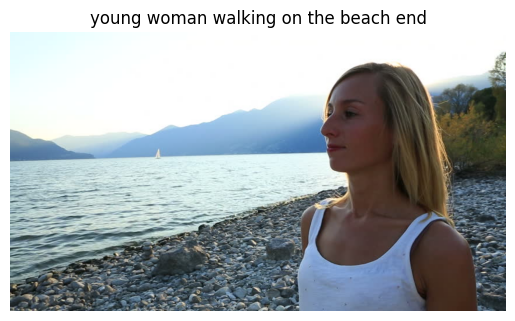

🖼️ 716.jpg
📝 Generated Caption: young woman walking on the beach end


In [ ]:
test_img = random.choice(list(image_features.keys()))
test_feature = image_features[test_img]
caption = generate_caption(test_feature, model, tokenizer, max_length)

# Show image with caption
img = Image.open(os.path.join(image_folder, test_img))
plt.imshow(img)
plt.axis('off')
plt.title(caption)
plt.show()

print(f"🖼️ {test_img}")
print(f"📝 Generated Caption: {caption}")

🔧 Step-by-Step Breakdown
Import Libraries – TensorFlow, Keras, PIL, Pandas, etc.

1.Load Data – Read image-caption pairs from a CSV file.

2.Text Preprocessing – Add <start> and <end> tokens to captions and tokenize them.

3.Feature Extraction – Use ResNet50 (without top layer) to convert each image into a 2048-dim feature vector.

4.Sequence Preparation – Convert captions into sequences of word indices and create training data pairs:
(Image Feature + Partial Caption ➝ Next Word)

5.Model Building –

Input 1: Image features → Dense layer

Input 2: Caption sequences → Embedding → LSTM

Combine both inputs → Dense → Output (word prediction)

6.Model Training – Trains the CNN-LSTM model using the image features and caption sequences.

7.Caption Generation – Predict one word at a time until <end> or max length is reached, building a full sentence.

8.Display – Shows the image with the generated caption.

